# PyTorch HandsON



| Story | Souce | Dataset | Description |
|-----|-----|------|------|
|[Story](https://www.pivotaltracker.com/story/show/188286656) | [Source](https://www.dataquest.io/blog/pytorch-for-beginners/) | |HandsOn PyTorch: Concepts, Foundations. Image Classification / DL Hello World |



#### Tensors

#### *Basics*

In [ ]:
# Create a tensor
import torch
import numpy as np

In [ ]:
ndarray = np.array([[5,6,7], [9,9,0]])
t = torch.from_numpy(ndarray)
print(t)

In [ ]:
# Tensor attributes
print(t.shape)
print(t.dtype)
print(t.device)

In [ ]:
# tensor from python list
t = torch.tensor([4,5,6])
print(t)

In [ ]:
# Multidimensional tensors
ndarray = np.array([[0,1,2], [3,4,5], [6,7,8]])
t = torch.from_numpy(ndarray)
print(t)

In [ ]:
# Create tensor from other tensor
new_t = torch.rand_like(t, dtype=torch.float)
print(new_t)

In [ ]:
# tensor defined by shape
m_shape = (5,5)
rand_t = torch.rand(m_shape)
print(rand_t)
print(rand_t[2:4,4])
transposed0 = rand_t.T
print(transposed0)

#### *Operations*

In [ ]:
zeros_tensor = torch.zeros((3,5))
print(zeros_tensor)

In [ ]:
# Indexing
print(zeros_tensor[1])
print(zeros_tensor[:,0])

In [ ]:
# Transposing
transposed = zeros_tensor.T
print(transposed)

In [ ]:
# Product of tensors
ones_tensor = torch.ones(5,3)
print(ones_tensor)
product = torch.matmul(zeros_tensor, ones_tensor)
print(product)

#### Data Loading

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

In [ ]:
training_data[0]

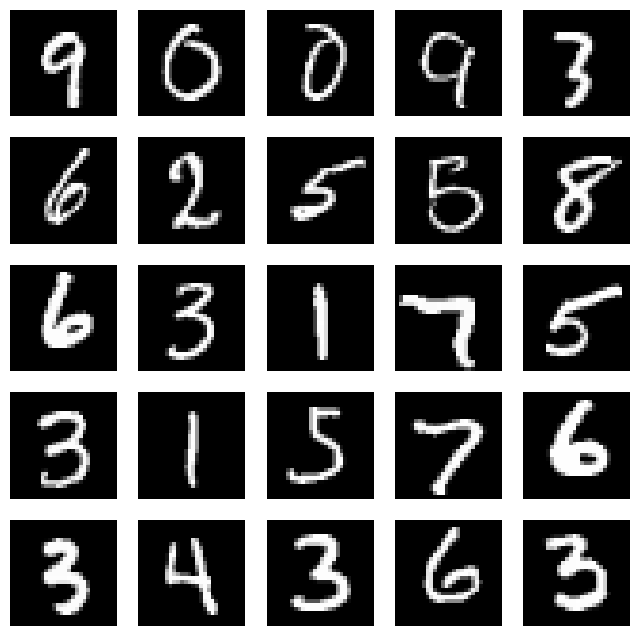

In [41]:
# Visualize images
figure = plt.figure(figsize=(8,8))
cols, rows = 5,5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [42]:
training_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [43]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)

#### Neural Network